In [57]:
from pyforest import *
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import  warnings

In [4]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Section-A


In [6]:
df.info()
##there are total ten variables out of which 8 are continuous variable and one is categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.shape

(214, 10)

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.isnull().sum()
## There are no null values in the dataset

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [68]:
##We can use euclidean distance method to find the distance 
Euclidean_Distance=np.sqrt((df['Ca']-df['Fe'])**2).sum()
Euclidean_Distance

1904.5900000000001

#Section B

In [16]:
X=df.iloc[:,:-1]
Y=df['Type']


In [18]:
from scipy.stats import zscore
df_scaled=X.apply(zscore)      ##converting all independent variables into a common zscore 
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [23]:
cluster_range=range(1,10)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(n_clusters=num_clusters)
    model.fit(df_scaled)
    cluster_inertia.append(model.inertia_)


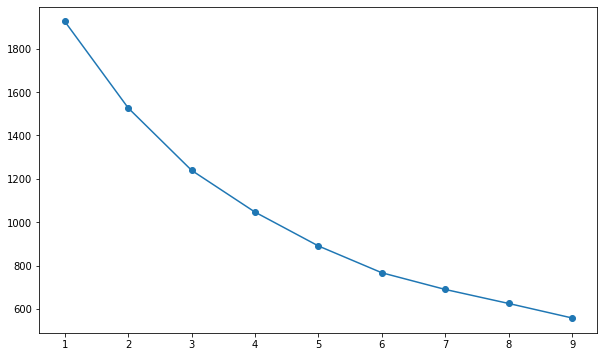

In [25]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range,cluster_inertia,marker='o')
plt.show()

In [27]:
## Taking two Independent Variables RI and Na and find there clusters through elbow plot

df_scaled_1=df_scaled.iloc[:,[0,1]]
df_scaled_1.head()

,RI,Na
0,0.872868,0.284953
1,-0.249333,0.591817
2,-0.721318,0.149933
3,-0.232831,-0.242853
4,-0.312045,-0.169205


In [29]:
cluster_range=range(1,10)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(n_clusters=num_clusters)
    model.fit(df_scaled_1)
    cluster_inertia.append(model.inertia_)


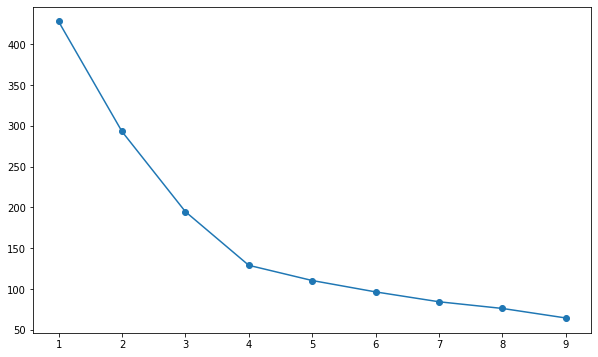

In [31]:
##Elbow plot of selected variables(Ri and Na)
plt.figure(figsize=(10,6))
plt.plot(cluster_range,cluster_inertia,marker='o')
plt.show()
## From below diagram we can see 3 clusters(k=3)

In [33]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans.fit(df_scaled_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [35]:
centroids=kmeans.cluster_centers_   ###cluster centroid value is calculated for two selected variables
centroids

array([[-0.02329619,  1.16792944],
       [ 1.95797011, -0.72106941],
       [-0.37405425, -0.42822748]])

In [37]:
centroid_df_1=pd.DataFrame(centroids,columns=list(df_scaled_1))
centroid_df_1
## From below we can say that the attributes RI and Na has three distinct classes according to their centroid values as shown below

,RI,Na
0,-0.023296,1.167929
1,1.957970,-0.721069
2,-0.374054,-0.428227


In [70]:
df_1=df_scaled_1.loc[0]
df_1
df_2=df.iloc[:,[0,2]]
df_2

,RI,Mg
0,1.52101,4.49
1,1.51761,3.60
2,1.51618,3.55
3,1.51766,3.69
4,1.51742,3.62
...,...,...
209,1.51623,0.00
210,1.51685,0.00
211,1.52065,0.00
212,1.51651,0.00


In [72]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
kmeans.fit(df_2)
y_kmeans= kmeansmodel.fit_predict(df_2)


In [74]:
##Visualising all the clusters of two selected variables Rl and Mg through scatter plot
plt.scatter(df_2[y_kmeans == 0, 0], df_2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_2[y_kmeans == 1, 0], df_2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_2[y_kmeans == 2, 0], df_2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of two variables')

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True]), 0)' is an invalid key

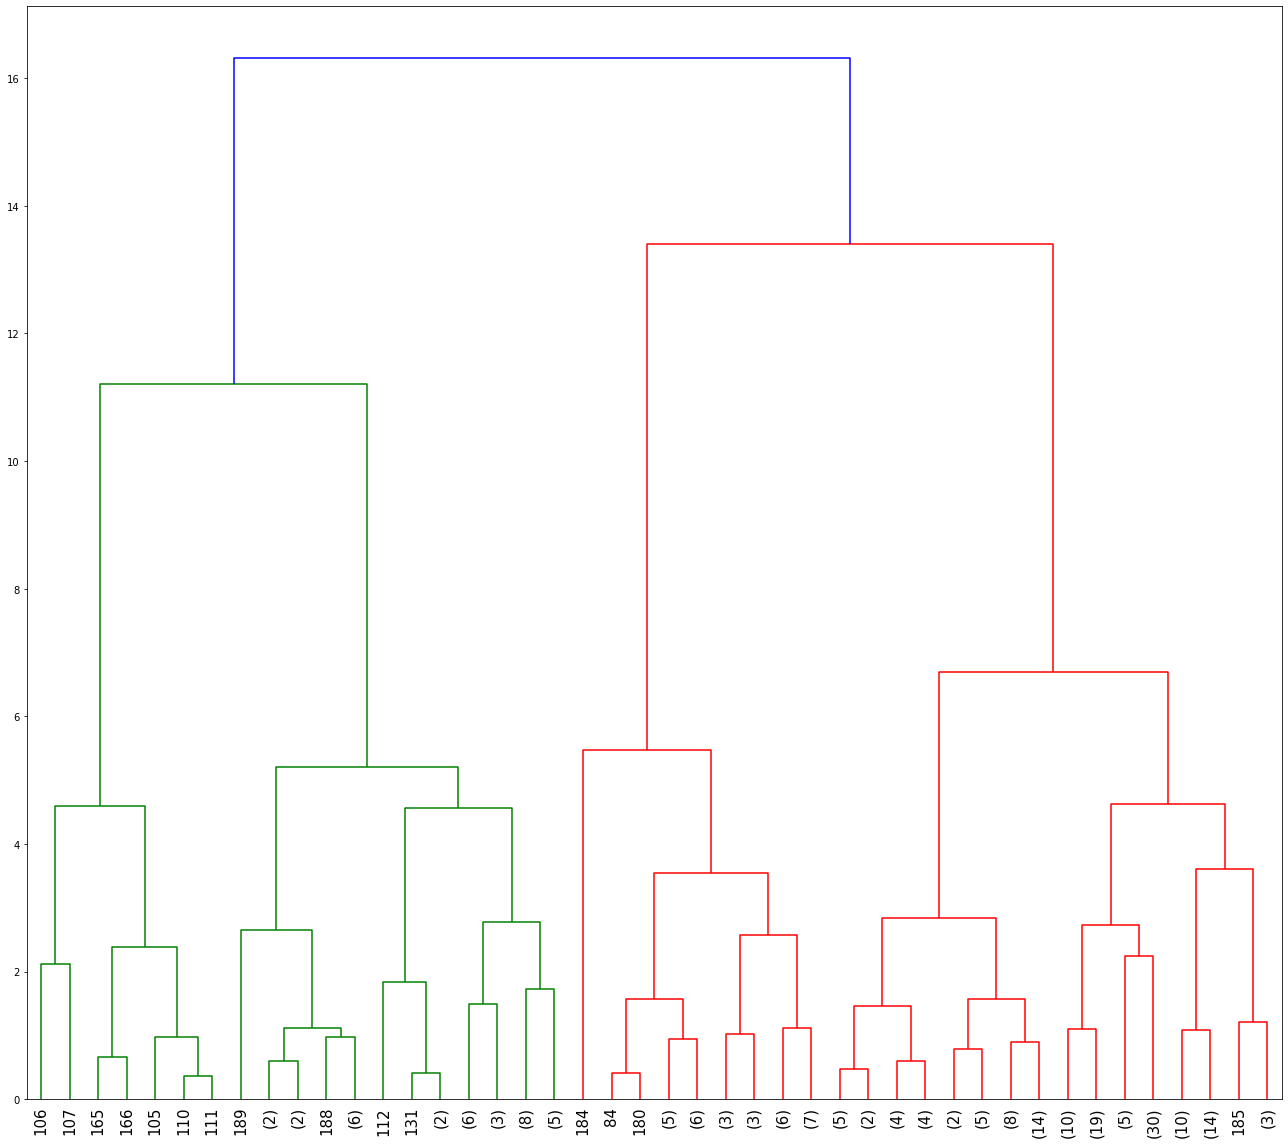

In [45]:
##Performing dendogram on my two selected features
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(18,16))
z=linkage(df_scaled_1,'ward')
dendrogram(z,leaf_rotation=90.0,color_threshold=15,leaf_font_size=15,truncate_mode='level',p=5)
plt.tight_layout()

##Section C

In [47]:
##Let us make a model 
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [50]:
##Data prepartion by splitting independent and dependent variable
x=df.iloc[:,:-1]
y=df['Type']


In [52]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [54]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_test = independent_scalar.transform (x_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier 
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
predictValues_train = Dtree.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
predictValues_test = Dtree.predict(x_test)
accuracy_validate=accuracy_score(y_test, predictValues_test)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.7114093959731543
Validation Accuracy  ::  0.7230769230769231


##Random Forrest Classifier

In [65]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
predictValues_test = RFclassifier.predict(x_test)
accuracy_validate=accuracy_score(y_test, predictValues_test)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9060402684563759
Validation Accuracy  ::  0.6923076923076923


In [76]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [79]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict= model.predict(x_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


NameError: name 'metrics' is not defined

##With PCA